# Cargamos las librerias basicas

In [3]:
#Basicos para todo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Herramientas Financieras
import yfinance as yf
import quantstats as qs
import ffn 
import pyfolio as pf

#Limpieza de avisos
import warnings
warnings.filterwarnings(action='ignore')

#Configuraciones Basicas
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [20,9]

# Descargamos los tickers y los añadimos en un nuevo DataFrame

In [14]:

splv = yf.download("SPLV")
gld = yf.download("GLD")
spy = yf.download("SPY")
dataframe =pd.DataFrame()
dataframe['SPLV'] = splv['Adj Close']
dataframe['GLD'] = gld['Adj Close']
dataframe['SPY'] = spy['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Creamos  las señales que nos indicaran en que activo debemos estar invertidos

Vamos a crear dos señales, 1 para el oro, y 0 para el indice de renta variable,  
y mediante .loc vamos a acceder a las fechas del indice con condiciones, para asignarlo a una colunmna.

In [15]:
dataframe.loc[(dataframe.index.month==12) & (dataframe.index.day>=20), 'signal'] = 1
dataframe.loc[(dataframe.index.month==1),'signal'] = 1
dataframe.loc[(dataframe.index.month==2) & (dataframe.index.day<=20), 'signal'] = 1
dataframe.loc[(dataframe.index.month==8) ,'signal'] = 1
dataframe['signal'] = np.where(dataframe['signal']==1,1,0)

# Calculamos los retornos porcentuales de los activos

In [16]:
dataframe['gold_pct'] = dataframe['GLD'].pct_change()
dataframe['splv_pct'] = dataframe['SPLV'].pct_change()
dataframe['spy_pct']  = dataframe['SPY'].pct_change()

# Creamos el retorno del portfolio

Le indicamos que cuando signal == 1, utilice los retornos del oro, y cuando no, que utilice los de la renta variable

In [25]:
dataframe['returns'] = np.where(dataframe['signal']==1,dataframe['gold_pct'],dataframe['splv_pct'])

# Ploteamos los retornos de los tickers utilizados

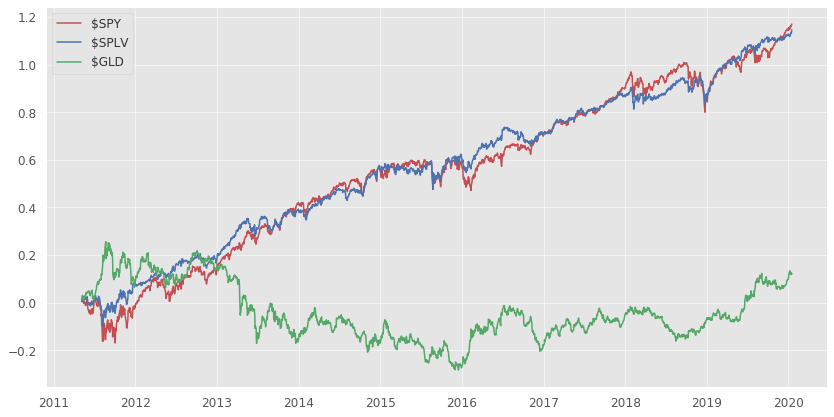

In [26]:
plt.figure(figsize=(14,7))
plt.plot(dataframe['spy_pct'].cumsum(), color='r', label='$SPY')
plt.plot(dataframe['splv_pct'].cumsum(),color='b', label='$SPLV')
plt.plot(dataframe['gold_pct'].cumsum(),color='g', label='$GLD')
plt.legend()
plt.show()

Observavamos como SPY y SPLV van siempre en una pelea constante entre ellos, y el oro esta en otro universo paralelo, comprobamos que no es muy buena idea almacenar posiciones en oro durante largos peridos de tiempo, pues conlleva un coste de oportunidad muy alto

# Comparacion de la curva de resultados

Creamos unos cuantos resultados aleatorios (siempre hay que compararse con el random walk, o analisis tecnico como lo llaman ahora ;) )

In [41]:
dataframe['random1'] = np.random.randint(2, size=len(dataframe))
dataframe['random1'] = np.where(dataframe['random1'] == True, dataframe['spy_pct'], -0)
dataframe['random2'] = np.random.randint(2, size=len(dataframe))
dataframe['random2'] = np.where(dataframe['random2'] == True, dataframe['spy_pct'], -0)

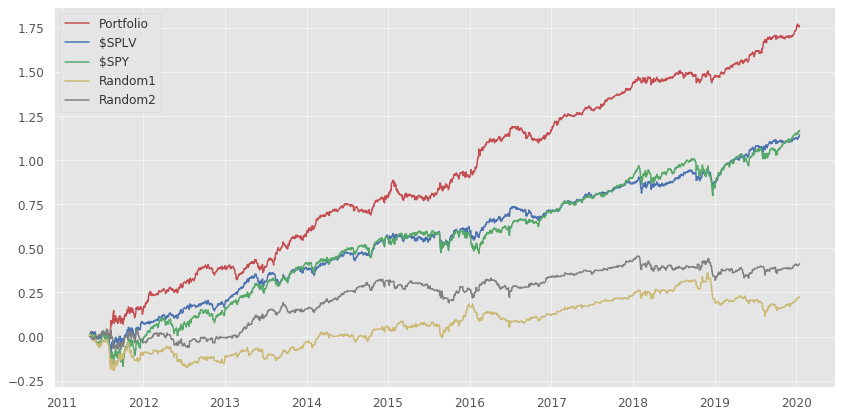

In [50]:
plt.figure(figsize=(14,7))
plt.plot(dataframe['returns'].cumsum(), color='r', label='Portfolio')
plt.plot(dataframe['splv_pct'].cumsum(),color='b', label='$SPLV')
plt.plot(dataframe['spy_pct'].cumsum(),color='g', label='$SPY')
plt.plot(dataframe['random1'].cumsum(),color='y', label='Random1')
plt.plot(dataframe['random2'].cumsum(),color='grey', label='Random2')
plt.legend()
plt.show()